# Medical Insurance Data Analysis & Visualization

In [1]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import NumPy for numerical operations, especially for array-based math and stats
import numpy as np

# Import matplotlib for basic data visualization (especially plotting charts)
import matplotlib.pyplot as plt

# Import seaborn for more advanced and styled statistical visualizations
import seaborn as sns


# Data Collection & Cleaning

Imported data from kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance/data

In [2]:
# Import the kagglehub library to programmatically download datasets from Kaggle
import kagglehub

# Download the latest version of the "insurance" dataset by mirichoi0218
# This returns the local path where the dataset was saved
path = kagglehub.dataset_download("mirichoi0218/insurance")

# Print the path to confirm where the dataset was downloaded
print("Path to dataset files:", path)

# Load the insurance.csv file into a pandas DataFrame
df = pd.read_csv(path + "/insurance.csv")

# Display the first 5 rows of the dataset to preview the structure and values
df.head()


Path to dataset files: /kaggle/input/insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Output the sum of all missing values for each column in dataset
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [4]:
# Display a concise summary of the DataFrame including column names, non-null counts, and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Print the number of entries for each unique region in the dataset
df['region'].value_counts()


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [6]:
# Standardize region names by capitalizing directional words for consistency
df['region'].replace({'southeast': 'SouthEast',
                      'southwest': 'SouthWest',
                      'northeast': 'NorthEast',
                      'northwest': 'NorthWest'}, inplace=True)


<ipython-input-6-d5a98652caac>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].replace({'southeast': 'SouthEast',


In [7]:
# Print the Region column
df['region']

,region
0,SouthWest
1,SouthEast
2,SouthEast
3,NorthWest
4,NorthWest
...,...
1333,NorthWest
1334,NorthEast
1335,SouthEast
1336,SouthWest


In [8]:
# Changing the (region, sex, smoker) dataType to category
df['region']= df['region'].astype('category')
df['sex']= df['sex'].astype('category')
df['smoker']= df['smoker'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,SouthWest,16884.92400
1,18,male,33.770,1,no,SouthEast,1725.55230
2,28,male,33.000,3,no,SouthEast,4449.46200
3,33,male,22.705,0,no,NorthWest,21984.47061
4,32,male,28.880,0,no,NorthWest,3866.85520


In [11]:
df['sex_num']= df['sex'].map({'female':1,'male':0})
df['smoker_num']= df['smoker'].map({'yes':1,'no':0})

In [12]:
df['smoker_num'] = df['smoker_num'].astype('int64')
df['sex_num'] = df['sex_num'].astype('int64')

In [13]:
df['smoker_num'].dtype

dtype('int64')

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num
0,19,female,27.900,0,yes,SouthWest,16884.92400,1,1
1,18,male,33.770,1,no,SouthEast,1725.55230,0,0
2,28,male,33.000,3,no,SouthEast,4449.46200,0,0
3,33,male,22.705,0,no,NorthWest,21984.47061,0,0
4,32,male,28.880,0,no,NorthWest,3866.85520,0,0


In [15]:
df.describe()

,age,bmi,children,charges,sex_num,smoker_num
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_num', 'smoker_num'],
      dtype='object')

In [17]:
df.index

RangeIndex(start=0, stop=1338, step=1)

In [18]:
df.shape

(1338, 9)

# Box Plot Visualizations

Box plot using matplotlib

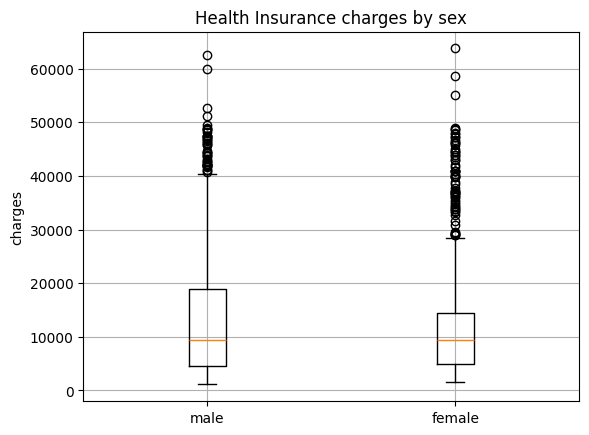

In [19]:
plt.boxplot([df[df['sex'] == 'male']['charges'], df[df['sex'] == 'female'] ['charges'] ])
plt.xticks([1,2],['male','female'])
plt.title('Health Insurance charges by sex')
plt.grid()
plt.ylabel('charges')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         1338 non-null   int64   
 1   sex         1338 non-null   category
 2   bmi         1338 non-null   float64 
 3   children    1338 non-null   int64   
 4   smoker      1338 non-null   category
 5   region      1338 non-null   category
 6   charges     1338 non-null   float64 
 7   sex_num     1338 non-null   int64   
 8   smoker_num  1338 non-null   int64   
dtypes: category(3), float64(2), int64(4)
memory usage: 67.2 KB


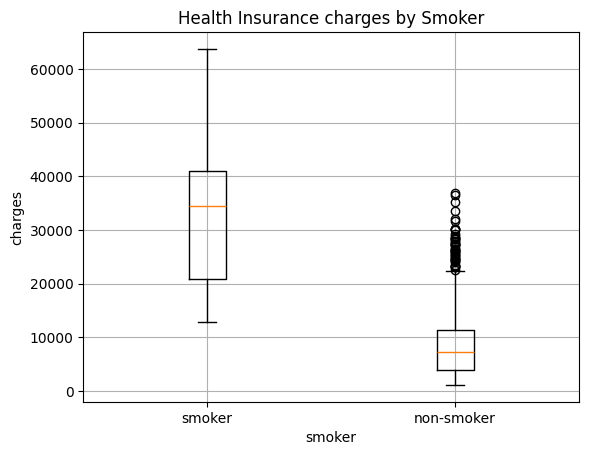

In [21]:
plt.boxplot([df[df['smoker'] == 'yes']['charges'], df[df['smoker'] == 'no'] ['charges'] ])
plt.xticks([1,2],['smoker','non-smoker'])
plt.title('Health Insurance charges by Smoker')
plt.grid()
plt.ylabel('charges')
plt.xlabel('smoker')
plt.show()

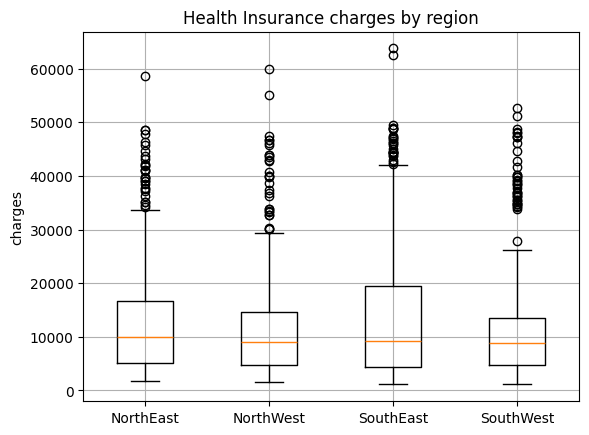

In [22]:
plt.boxplot([df[df['region'] == 'NorthEast']['charges'], df[df['region'] == 'NorthWest'] ['charges'],df[df['region'] == 'SouthEast'] ['charges'],df[df['region'] == 'SouthWest'] ['charges']])
plt.xticks([1,2,3,4],['NorthEast','NorthWest','SouthEast','SouthWest'])
plt.title('Health Insurance charges by region')
plt.grid()
plt.ylabel('charges')
plt.show()

Box plot using seaborn

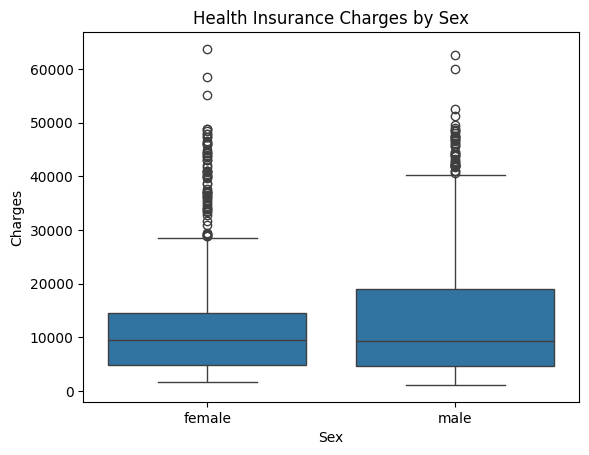

In [23]:
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Health Insurance Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

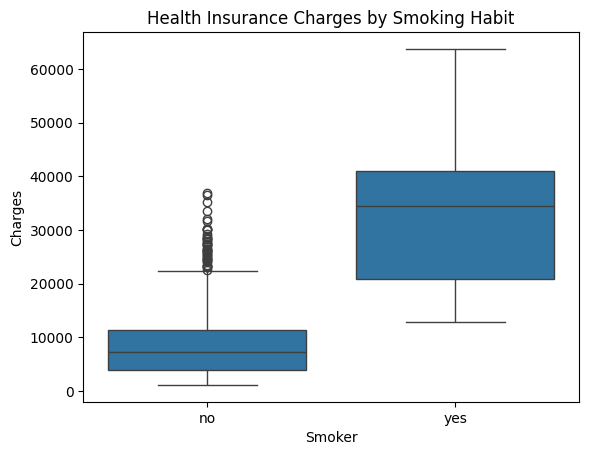

In [24]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Health Insurance Charges by Smoking Habit')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

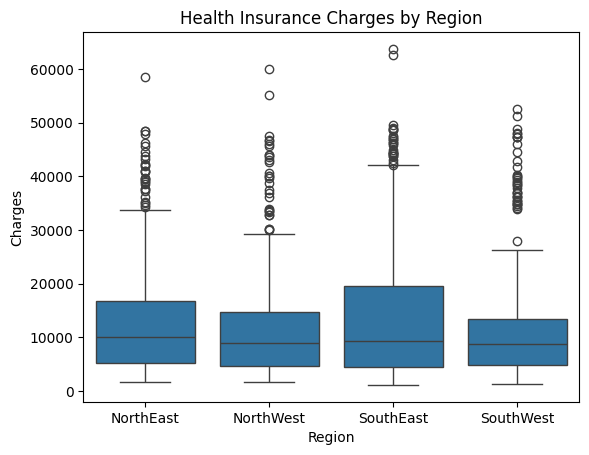

In [25]:
sns.boxplot(x='region', y='charges', data=df)
plt.title('Health Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

Box plot using Plotly

In [26]:
import plotly.express as px

# Plotting Health Insurance Charges by Sex with Plotly Express
fig = px.box(df, x="sex", y="charges", color="sex",
             title="Health Insurance Charges by Sex")

fig.show()


In [27]:
# Plotting Health Insurance Charges by Smoker with Plotly Express
fig = px.box(df, x="smoker", y="charges", color="smoker",
             title="Health Insurance Charges by Smoker")

fig.show()

In [28]:
# Plotting Health Insurance Charges by Region with Plotly Express
fig = px.box(df, x="region", y="charges", color="region",
             title="Health Insurance Charges by Region")

fig.show()

In [29]:
# Plotting Health Insurance Charges by Smoker and Sex with Plotly Express
fig = px.box(df, x="smoker", y="charges", color="sex",
             title="Health Insurance Charges by Smoker and Sex")

fig.show()

In [30]:
# Plotting Health Insurance Charges by Sex and Smoking Habit with Plotly Express
fig = px.box(df, x="sex", y="charges", color="smoker",
             title="Health Insurance Charges by Sex and Smoking Habit")

fig.show()

# Extended visualizations

**Regression Plot**

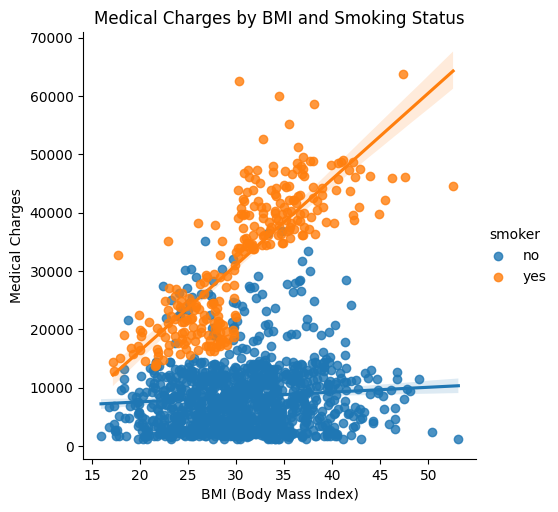

In [31]:
ax = sns.lmplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title("Medical Charges by BMI and Smoking Status")
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("Medical Charges")
plt.show()

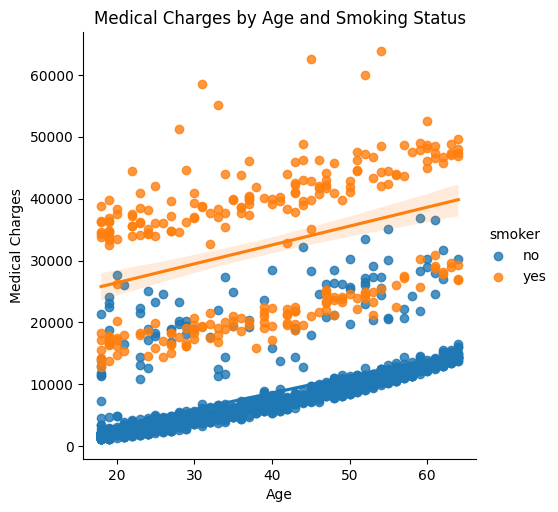

In [32]:
ax = sns.lmplot(x='age', y='charges', data=df, hue='smoker')
plt.title("Medical Charges by Age and Smoking Status")
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.show()

Correlation heatmap

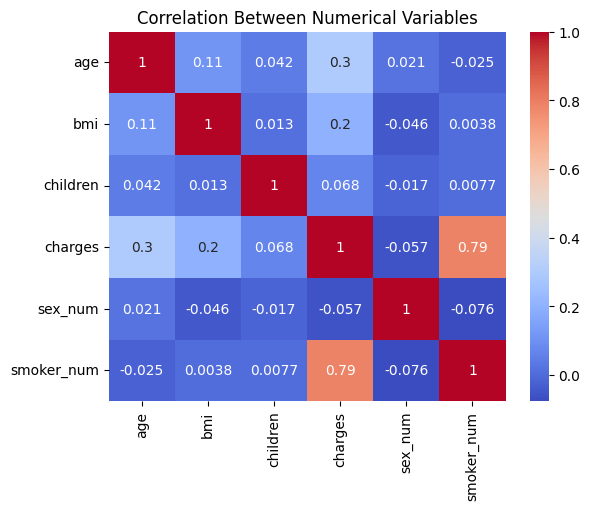

In [33]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Variables")
plt.show()

**Waffle chart**

In [34]:
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 26.6 MB/s eta 0:00:00


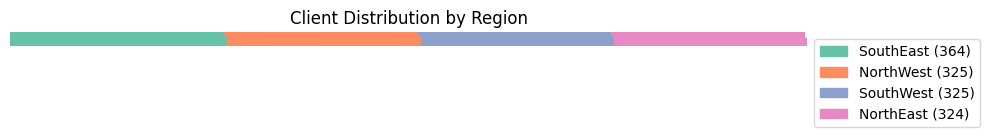

In [35]:
from pywaffle import Waffle
import matplotlib.pyplot as plt
counts = df['region'].value_counts()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=counts,
    title={'label': 'Client Distribution by Region', 'loc': 'center'},
    labels=[f"{k} ({v})" for k, v in counts.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(10, 6)
)
plt.show()

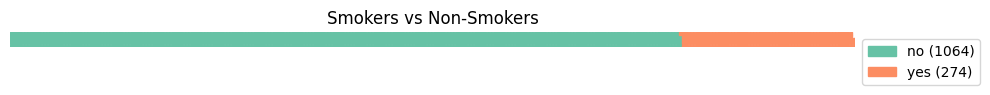

In [36]:
counts = df['smoker'].value_counts()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=counts,
    title={'label': 'Smokers vs Non-Smokers', 'loc': 'center'},
    labels=[f"{k} ({v})" for k, v in counts.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(10, 6)
)
plt.show()

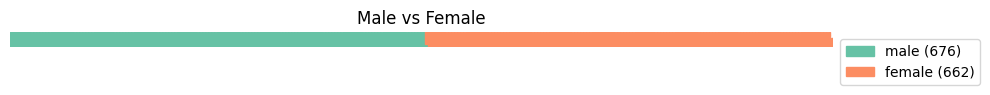

In [37]:
counts = df['sex'].value_counts()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=counts,
    title={'label': 'Male vs Female', 'loc': 'center'},
    labels=[f"{k} ({v})" for k, v in counts.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(10, 6)
)
plt.show()

<ipython-input-38-521fb3f1e2b2>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



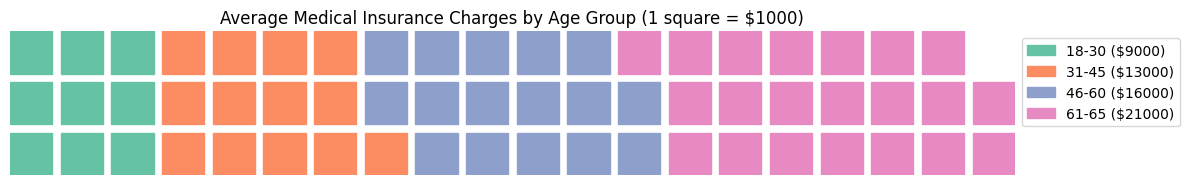

In [38]:
# Group ages into categories
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 45, 60, 65], labels=['18-30', '31-45', '46-60', '61-65'])

# Calculate average charges for each age group
charges_per_group = df.groupby('age_group')['charges'].mean()

# Scale values: each square represents $1000
values = (charges_per_group / 1000).round().astype(int)

# Create the waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=3,
    values=values,
    title={'label': 'Average Medical Insurance Charges by Age Group (1 square = $1000)', 'loc': 'center'},
    labels=[f"{index} (${value*1000:.0f})" for index, value in values.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(12, 6)
)
plt.show()

Text(0, 0.5, 'Average Charges')

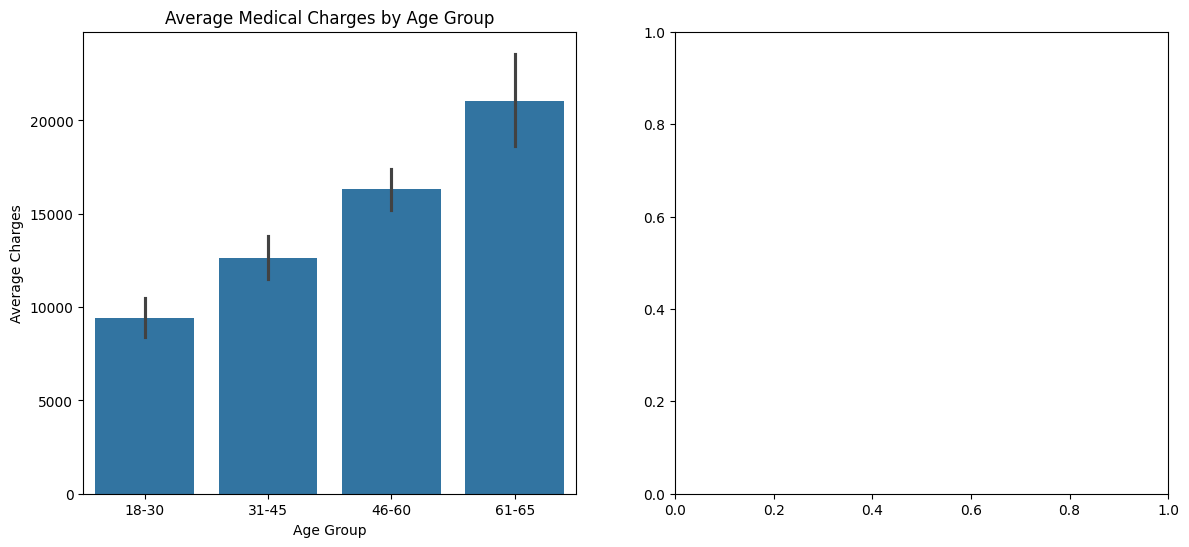

In [40]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Barplot: average medical charges
sns.barplot(x='age_group', y='charges', data=df, estimator='mean', ax=axes[0])
axes[0].set_title("Average Medical Charges by Age Group")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Average Charges")